In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1-installation et import des packages

In [2]:
! pip install wordcloud
! pip install twepy

ERROR: Could not find a version that satisfies the requirement twepy (from versions: none)
ERROR: No matching distribution found for twepy


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

2- import des donnees et analyses primaires


In [5]:
df=pd.read_csv('/content/drive/MyDrive/project/Tweets.csv')

In [6]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


Exploration des donnees

In [7]:
df.shape

(27481, 4)

In [8]:
df['sentiment'].value_counts()/df.shape[0] # analyse de la réparation des classes de sentiments


,count
sentiment,
neutral,0.404570
positive,0.312288
negative,0.283141


In [9]:
df.isna().sum() # analyse des valeurs manquantes

,0
textID,0
text,1
selected_text,1
sentiment,0


In [10]:
print(df[df.duplicated()]) # analyses de lignes dupliquées


Empty DataFrame
Columns: [textID, text, selected_text, sentiment]
Index: []


In [11]:
df=df.dropna(axis=0)# suppression des valeurs manquantes


In [12]:
df.isna().sum()# verification de l'opéra de suppression


,0
textID,0
text,0
selected_text,0
sentiment,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


Selection des variables

In [14]:
df_selected=df[['sentiment','text']] # sélection des variables


In [15]:
df_select=df_selected


In [16]:
df_selected=df_selected[(df_selected['sentiment']=='positive')|(df_selected['sentiment']=='negative')] # selection des classes sur les quelles nous allons travailler (positif, négatif)


In [17]:
df_selected.shape # dimensions du nouveau dataset


(16363, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [19]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
df_selected['sentiment']=LabelEncoder().fit_transform(df_selected['sentiment']) # encodage de la variable à predire


<ipython-input-21-93d9baae9fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sentiment']=LabelEncoder().fit_transform(df_selected['sentiment']) # encodage de la variable à predire


In [22]:
df_selected # visualisation du dataset après encodage


,sentiment,text
1,0,Sooo SAD I will miss you here in San Diego!!!
2,0,my boss is bullying me...
3,0,what interview! leave me alone
4,0,"Sons of ****, why couldn`t they put them on t..."
6,1,2am feedings for the baby are fun when he is a...
...,...,...
27475,1,enjoy ur night
27476,0,wish we could come see u on Denver husband l...
27477,0,I`ve wondered about rake to. The client has ...
27478,1,Yay good for both of you. Enjoy the break - y...


In [23]:
df_selected['sentiment'].value_counts()/df_selected.shape[0] # analyse des nouvelles proportions


,count
sentiment,
1,0.524476
0,0.475524


In [24]:
df_selected=df_selected.sample(n=16000,random_state=42)


In [25]:
# division du dataset en sentiment positif et négatif
tweet_positif=df_selected[df_selected['sentiment']==1]
tweet_negatif=df_selected[df_selected['sentiment']==0]

In [26]:
# fonction pour generer les word cloud qui affichent les mot les plus frequents
def word_cloud_generator(tweets,titre):
    all_text=''.join(tweets)
    word=WordCloud(width=800,height=400,background_color='white').generate(all_text)
    plt.figure(figsize=(10,5))
    plt.imshow(word,interpolation='bilinear')
    plt.title(titre)
    plt.axis('off')
    plt.show()

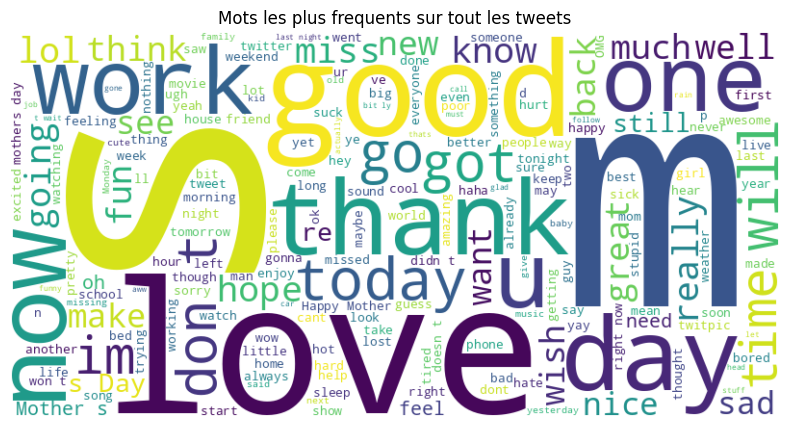

In [27]:
word_cloud_generator(df_selected['text'],'Mots les plus frequents sur tout les tweets')


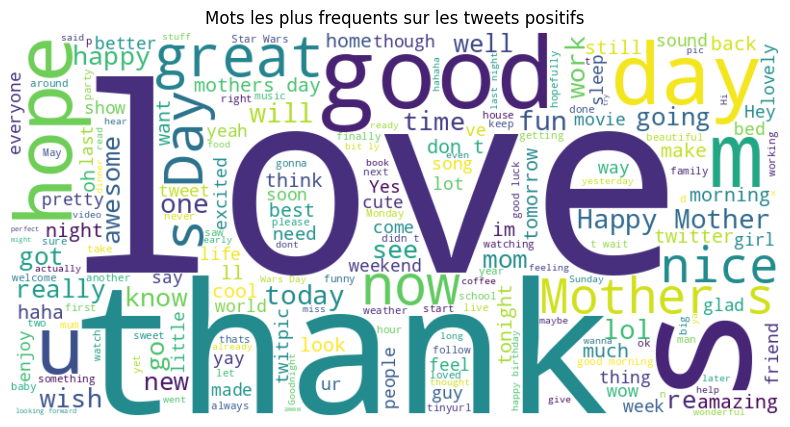

In [28]:
word_cloud_generator(tweet_positif['text'],'Mots les plus frequents sur les tweets positifs')


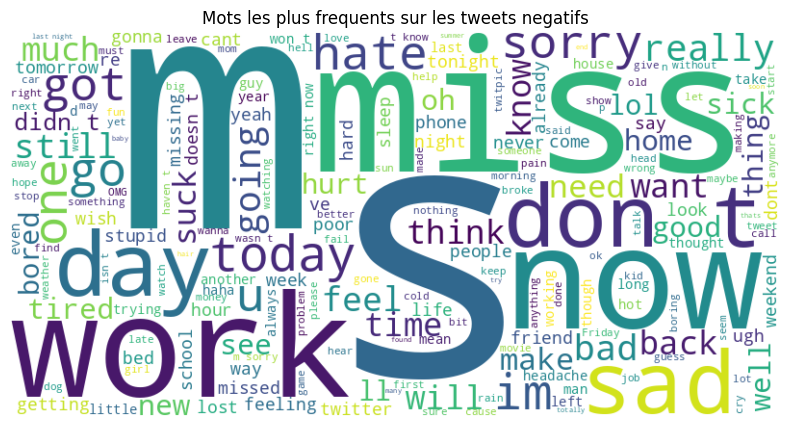

In [29]:
word_cloud_generator(tweet_negatif['text'],'Mots les plus frequents sur les tweets negatifs')


In [30]:
['miss','thank','love','work','','now','really','one','mothers']


['miss', 'thank', 'love', 'work', '', 'now', 'really', 'one', 'mothers']

3- traitement des donnees

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [32]:
nltk.download('/root/nltk_data/wordnet')
nltk.download('punkt')
nltk.download('stopwords')
!pip install google-cloud-translate
!pip install googletrans
!pip install transformers

[nltk_data] Error loading /root/nltk_data/wordnet: Package
[nltk_data]     '/root/nltk_data/wordnet' not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15719 sha256=9e5d0bde2a0c332688382f5af1ad4eadbea2a646246cdef84060bb1a7cd25f4c
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
   

In [33]:
def clean_text(text):
    # suppression des caracteres speciaux et des ponctuations
    text=re.sub(r"[^\w\s]","",text)
    text = text.lower()  # Convertit le texte en minuscules
    text = re.sub('\[.*?\]', '', text)  # Supprime le texte entre crochets
    text = re.sub("\\W"," ", text)  # Remplace les non-alphanumériques par des espaces
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Supprime les URLs
    text = re.sub('<.*?>+', '', text)  # Supprime les balises HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Supprime la ponctuation
    text = re.sub('\n', '', text)  # Supprime les nouvelles lignes
    text = re.sub('\w*\d\w*', '', text)  # Supprime les mots contenant des chiffres
    # traduction

    #Tokenisation
    tokens=word_tokenize(text)
    # lematisation
    #tokens2=[]
    #for i in tokens:
        #lem1=WordNetLemmatizer().lemmatize(i,pos='v')
        #lem2=WordNetLemmatizer().lemmatize(lem1,pos='s')
        #lem=WordNetLemmatizer().lemmatize(lem2,pos='a')
        #tokens2.append(lem)
    #tokens=tokens2

    #suppresiion des mots vides
    stop_words=[]
    tokens=[word for word in tokens if word not in stop_words]

    #joindre les token en une seul chaine
    cleaned_text=' '.join(tokens)

    return cleaned_text


In [34]:
# stopwords.words("english")
tokens=['miss','thank','love','work','','now','really','one','a','runing']
# stop_words=['miss','thank','love','work','','now','really','one','mothers']
# tokens=[word for word in tokens if word not in stop_words]
# tokens

In [35]:
df_selected['clean_text']=df_selected['text'].apply(clean_text)


In [36]:
df_selected.head(20)


,sentiment,text,clean_text
14813,1,thanks will try to behave,thanks will try to behave
18134,0,Today is lame because I am not in Orlando I a...,today is lame because i am not in orlando i am...
9074,1,hahahaha! i laughed my **** off just now. thanks,hahahaha i laughed my off just now thanks
23126,0,Gahh ! This weather sucksss !,gahh this weather sucksss
16935,1,Fallen in love with enter shikari again. Might...,fallen in love with enter shikari again might ...
3456,1,ten update away from 2000 whooo hoooo budden!,ten update away from whooo hoooo budden
208,1,im thinking that im going to have fun tonight....,im thinking that im going to have fun tonighta...
4888,0,Sitting in boring **** litterature listening t...,sitting in boring litterature listening to jac...
14458,0,oh but that girl but AIDAN!,oh but that girl but aidan
4922,0,I`ve been losing myself into too many Taiwanes...,ive been losing myself into too many taiwanese...


In [37]:
tweet_positif=df_selected[df_selected['sentiment']==1]
tweet_negatif=df_selected[df_selected['sentiment']==0]

In [38]:
tweet_negatif


,sentiment,text,clean_text
18134,0,Today is lame because I am not in Orlando I a...,today is lame because i am not in orlando i am...
23126,0,Gahh ! This weather sucksss !,gahh this weather sucksss
4888,0,Sitting in boring **** litterature listening t...,sitting in boring litterature listening to jac...
14458,0,oh but that girl but AIDAN!,oh but that girl but aidan
4922,0,I`ve been losing myself into too many Taiwanes...,ive been losing myself into too many taiwanese...
...,...,...,...
5213,0,its not a starfleet one its not even a romul...,its not a starfleet one its not even a romulin...
7641,0,my brother is irritating. and not just bc he t...,my brother is irritating and not just bc he ta...
19978,0,At home now. Feeling very tired. I want to tak...,at home now feeling very tired i want to take ...
26917,0,my heart hurts too.,my heart hurts too


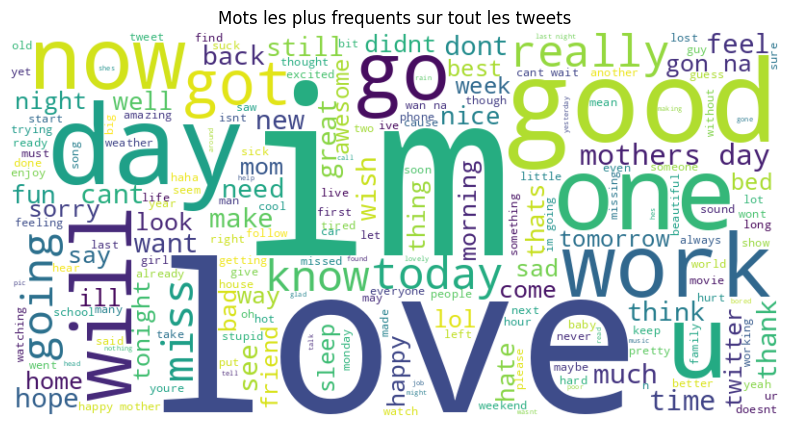

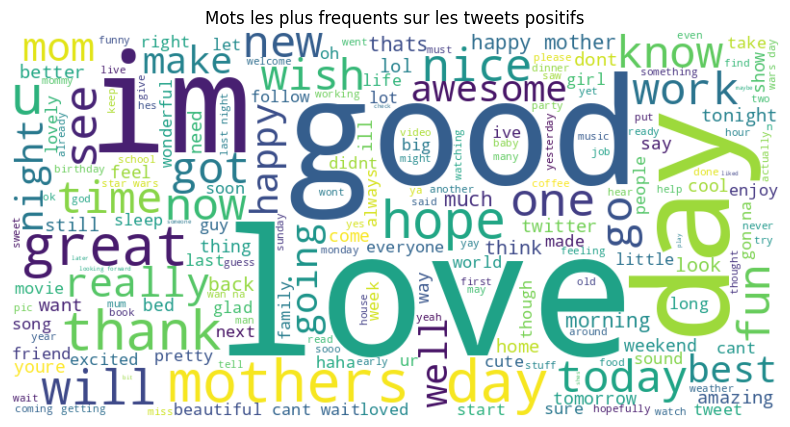

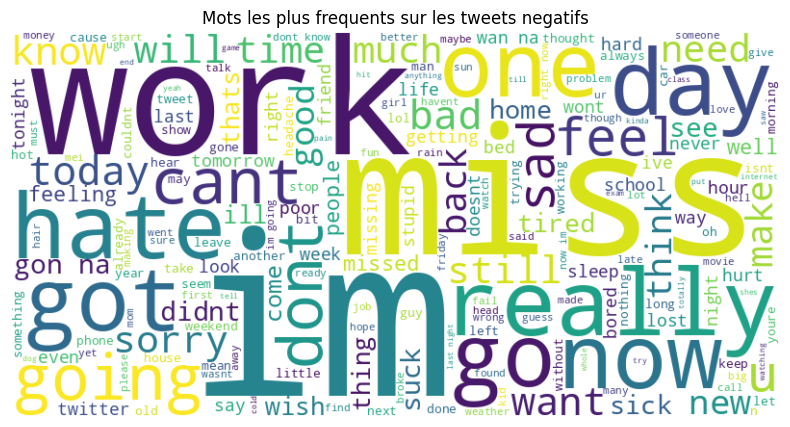

In [39]:
word_cloud_generator(df_selected['clean_text'],'Mots les plus frequents sur tout les tweets')
word_cloud_generator(tweet_positif['clean_text'],'Mots les plus frequents sur les tweets positifs')
word_cloud_generator(tweet_negatif['clean_text'],'Mots les plus frequents sur les tweets negatifs')

4-transformation du text en donnee numerique: Vectorisation

In [40]:
vectorizer=TfidfVectorizer()


In [41]:
text_vectorizer=vectorizer.fit_transform(df_selected['clean_text'].values)


In [42]:
features=text_vectorizer.toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

5-Modelisation

In [43]:
x_train,x_test,y_train,y_test=train_test_split(features,df_selected['sentiment'],test_size=0.2,random_state=42,stratify=df_selected['sentiment'])


In [44]:
model=LogisticRegression()


In [45]:
# entrainement du model
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8790625


In [47]:
from sklearn.metrics import roc_curve, auc , f1_score, precision_score , recall_score


In [48]:
# predictions du model
y_train_pred=model.predict_proba(x_train)[:,1]
y_test_pred=model.predict_proba(x_test)[:,1]
fpr_train,tpr_train,seuil_train=roc_curve(y_train,y_train_pred)
roc_auc_train=auc(fpr_train,tpr_train)
fpr_test,tpr_test,seuil_test=roc_curve(y_test,y_test_pred)
roc_auc_test=auc(fpr_test,tpr_test)

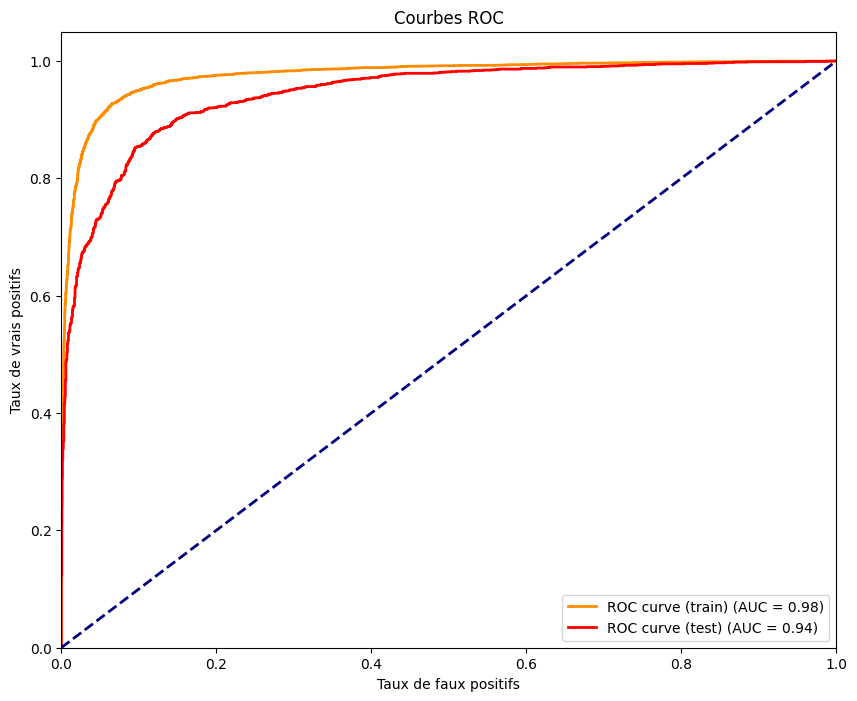

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1523
           1       0.89      0.88      0.88      1677

    accuracy                           0.88      3200
   macro avg       0.88      0.88      0.88      3200
weighted avg       0.88      0.88      0.88      3200



<Axes: >

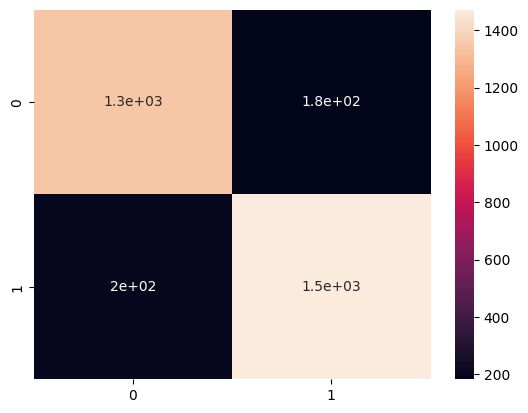

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [53]:
confusion_matrix(y_test,y_pred)


array([[1341,  182],
       [ 205, 1472]])

In [54]:
def sentiment_prediction(text):
    text_clean=clean_text(text)
    text_final=vectorizer.transform([text_clean])
    text_final=text_final.toarray()
    prediction=model.predict(text_final)
    return prediction[0]

In [55]:
test_text2='I\'m happy with what you did'


In [56]:
sentiment_prediction(test_text2)


1

In [57]:
sentiment_prediction('Gahh ! This weather sucksss')


0